Gravitational Redshift (rv_grav)
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.3 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.3,<2.4"

As always, let's do imports and initialize a logger and a new bundle.

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

In [3]:
b.add_dataset('rv', times=np.linspace(0,1,101), dataset='rv01')

<ParameterSet: 76 parameters | contexts: dataset, constraint, figure, compute>

In [4]:
b.set_value_all('ld_mode', 'manual')
b.set_value_all('ld_func', 'logarithmic')
b.set_value_all('ld_coeffs', [0.0, 0.0])
b.set_value_all('atm', 'blackbody')

Relevant Parameters
--------------------

Gravitational redshifts are only accounted for flux-weighted RVs (dynamical RVs literally only return the z-component of the velocity of the center-of-mass of each star).

First let's run a model with the default radii for our stars.

In [5]:
print(b['value@requiv@primary@component'], b['value@requiv@secondary@component'])

1.0 1.0


Note that gravitational redshift effects for RVs (rv_grav) are disabled by default.  We could call add_compute and then set them to be true, or just temporarily override them by passing rv_grav to the run_compute call.

In [6]:
b.run_compute(rv_method='flux-weighted', rv_grav=True, irrad_method='none', model='defaultradii_true')

100%|██████████| 101/101 [00:01<00:00, 81.71it/s]


<ParameterSet: 5 parameters | components: primary, secondary>

Now let's run another model but with much smaller stars (but with the same masses).

In [7]:
b['requiv@primary'] = 0.4
b['requiv@secondary'] = 0.4

In [8]:
b.run_compute(rv_method='flux-weighted', rv_grav=True, irrad_method='none', model='smallradii_true')

100%|██████████| 101/101 [00:00<00:00, 114.34it/s]


<ParameterSet: 5 parameters | components: primary, secondary>

Now let's run another model, but with gravitational redshift effects disabled

In [9]:
b.run_compute(rv_method='flux-weighted', rv_grav=False, irrad_method='none', model='smallradii_false')

100%|██████████| 101/101 [00:00<00:00, 134.34it/s]


<ParameterSet: 5 parameters | components: primary, secondary>

Influence on Radial Velocities
------------------

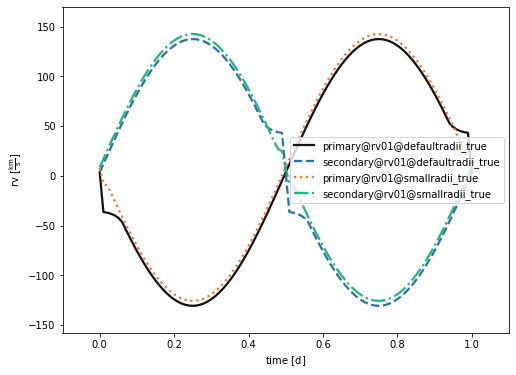

In [10]:
afig, mplfig = b.filter(model=['defaultradii_true', 'smallradii_true']).plot(legend=True, show=True)

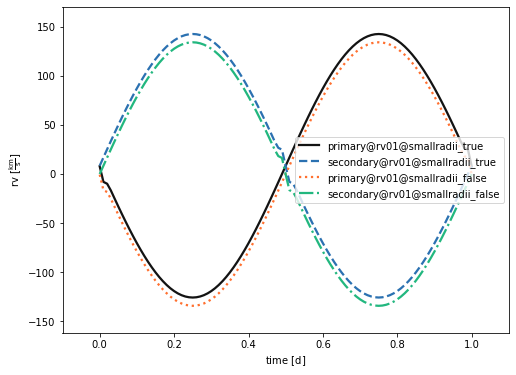

In [11]:
afig, mplfig = b.filter(model=['smallradii_true', 'smallradii_false']).plot(legend=True, show=True)

Besides the obvious change in the Rossiter-McLaughlin effect (not due to gravitational redshift), we can see that making the radii smaller shifts the entire RV curve up (the spectra are redshifted as they have to climb out of a steeper potential at the surface of the stars).

In [12]:
print(b['rvs@rv01@primary@defaultradii_true'].get_value().min())
print(b['rvs@rv01@primary@smallradii_true'].get_value().min())
print(b['rvs@rv01@primary@smallradii_false'].get_value().min())

-130.64101224138182
-125.64572575730138
-134.07104675706034


In [13]:
print(b['rvs@rv01@primary@defaultradii_true'].get_value().max())
print(b['rvs@rv01@primary@smallradii_true'].get_value().max())
print(b['rvs@rv01@primary@smallradii_false'].get_value().max())

137.43039513444785
142.4963680412456
134.07104704148668
